In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_render/nCoV_data_render.csv'
data = pd.read_csv(path)
data["Date"] = pd.to_datetime(data["Date"])
index_data = data.set_index(["Date"], drop=True)

# Check data
index_data.head()

,Total cases
Date,
2020-01-28,6061
2020-01-29,7816
2020-01-30,9821
2020-01-31,11948
2020-02-01,14551


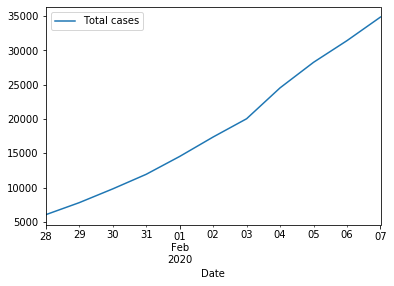

In [5]:
df = index_data[["Total cases"]]
df.plot()

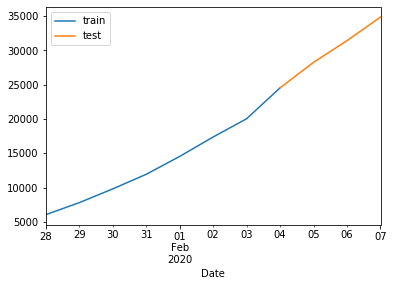

In [7]:
# Split data
split_date = pd.Timestamp('2020-02-04')

train = df.loc[:split_date]
test = df.loc[split_date:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [10]:
# SARIMAX
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
predict = model_fit.predict(7, len(data) - 1)

# MAPE Score
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

print(predict)
print("MAPE score is: " + str(MAPE(test, predict)))

2020-02-04    23747.757796
2020-02-05    26892.827137
2020-02-06    31143.364230
2020-02-07    34104.131568
Freq: D, dtype: float64
MAPE score is: 15.390957722821295


/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_de

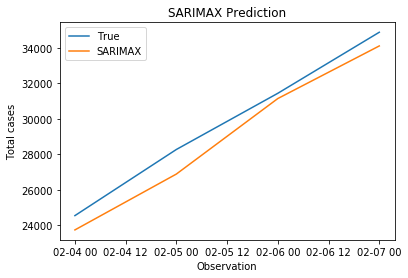

In [12]:
# Graphing
plt.plot(test, label='True')
plt.plot(predict, label='SARIMAX')
plt.title("SARIMAX Prediction")
plt.xlabel('Observation')
plt.ylabel('Total cases')
plt.legend()
plt.show()